# Squadpick

this notebook is made by squadpick team for grauation project. The project is about data science in sports especially in handball,
 by the agreement the team has made with handball analytics, and al ahly club we have got data from al Maadi men team and al Ahly women team.
 the project idea is about analyzing the data we can gather from the match to help the managers in thier decision making about the starting line-up
in the next match, the project depends on data such as goals, shots, 2 min suspension, block, and other skills related to the handball,
this idea has been implemnted in Euroupe but in a diffrent way but we are the first in Egypt to build such model.

This notebook was structured as follow:

1.   **Prepare Data**

*   Import
*   Connect Drive
*   Wrangle Function

2.   **EDA**

*   The Efficiency of all Players
*   The Efficiency of Each Position
*   The Efficiency of Center Backs (CB) in defence
*   Top Players Rating in a Season

3.   **Split**

4.   **Building a Model**
*   Baseline
*   Build Model 1 (Logestic Regerssion)
*   Communication Result 1 (Logestic Regerssion)
*   Build Model 2 (Desicion Tree)
*   Communication Result 2 (Desicion Tree)
*   Build Model 3 (Random Forest)
*   Communication Result 3 (Random Forest)
*   Build Model 4 (Support Vector Machines)
*   Communication Result 4 (Support Vector Machines)
*   Build Model 5 (Linear SVC)
*   Communication Result 5 (Linear SVC)
*   Build Model 6 (K-Nearest Neighbors (KNN))
*   Communication Result 6 (K-Nearest Neighbors (KNN))
*   Build Model 7 (Stochastic Gradient Descent (SGD))
*   Communication Result 7 (Stochastic Gradient Descent (SGD))

5.   **What is the Best algorithm ?**
*   Models Accuracy
*   Classification Reports

6.   **Communicate Results**

*   Save Module as Pickle
*   Test module
*   Create PDF


















# **Prepare Data**

##Import

In [ ]:
#this is the first step in the notebook, this is where we import all the libraries we could and would use in analyzing data, splititng data, building model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from ipywidgets import interact
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import ( ConfusionMatrixDisplay,classification_report,confusion_matrix)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.utils.validation import check_is_fitted
%matplotlib inline
sns.set()
#color = sns.color_palette()
from sklearn.preprocessing import FunctionTransformer
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

## Connect Drive

In [ ]:
#in this step we import the drive we uploded the drive on it
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Wrangle function

In [ ]:
"""
In this step we make our wrangle function, where we organize our data and any data will upload in the future in manner that helps us to build our model
in form that would produce the best possible accuracy.
"""
def wrangle(filepath):
    # Read CSV file
    df = pd.read_excel(filepath,sheet_name="Sheet1")
    # filling the NAN
    df.fillna(0,inplace=True)
    # drop low cardinality
    df.drop(columns=["ID","2_min_provoke"],inplace=True)
    # drop mulicorrelenaty
    df.drop(columns=["Shots","Scoring_rate"],inplace=True)
    # drop useless columns
    df.drop(columns=["9m_Miss","9m_Goal","7m_Goal","7m_Miss"],inplace=True)
    return df

In [ ]:
#applying the wrangle function we had made on our data
df= wrangle("/content/drive/MyDrive/Graduation project/Handball _Project_updated.xlsx")
df.head()


,ID_Match,Player_Name,Player_num,opponent_name,Date,position,Goals,Assist,failed_shots,Lost_ball,2_min_foul,block,Steal,FB_Goal,FB_Miss,7m_foul,7m_provoke,Rate,Average_rate_per match,Y
0,28,Amina_1,4,Smouha,2022-09-03,WL,0,0,0,0,0,0,0,0,0,0,0,0.00,2.138636,0
1,28,Alaa,99,Smouha,2022-09-03,WL,1,0,1,0,1,0,0,1,1,1,0,2.35,2.138636,1
2,28,Rana,20,Smouha,2022-09-03,WR,0,0,0,0,0,0,0,0,0,0,0,0.00,2.138636,0
3,28,Esraa,65,Smouha,2022-09-03,BL,0,0,0,0,0,0,0,0,0,0,0,0.00,2.138636,0
4,28,Dina,77,Smouha,2022-09-03,CB,2,5,0,3,0,0,1,0,0,2,2,7.90,2.138636,1


# EDA


## Check Cardnality

In [ ]:
#this code to get all information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID_Match                902 non-null    int64         
 1   Player_Name             902 non-null    object        
 2   Player_num              902 non-null    int64         
 3   opponent_name           902 non-null    object        
 4   Date                    902 non-null    datetime64[ns]
 5   position                902 non-null    object        
 6   Goals                   902 non-null    int64         
 7   Assist                  902 non-null    int64         
 8   failed_shots            902 non-null    int64         
 9   Lost_ball               902 non-null    int64         
 10  2_min_foul              902 non-null    int64         
 11  block                   902 non-null    int64         
 12  Steal                   902 non-null    int64     

In [ ]:
#this code shows the number of rows and columns
df.shape

(902, 20)

## Check Multicolinearity

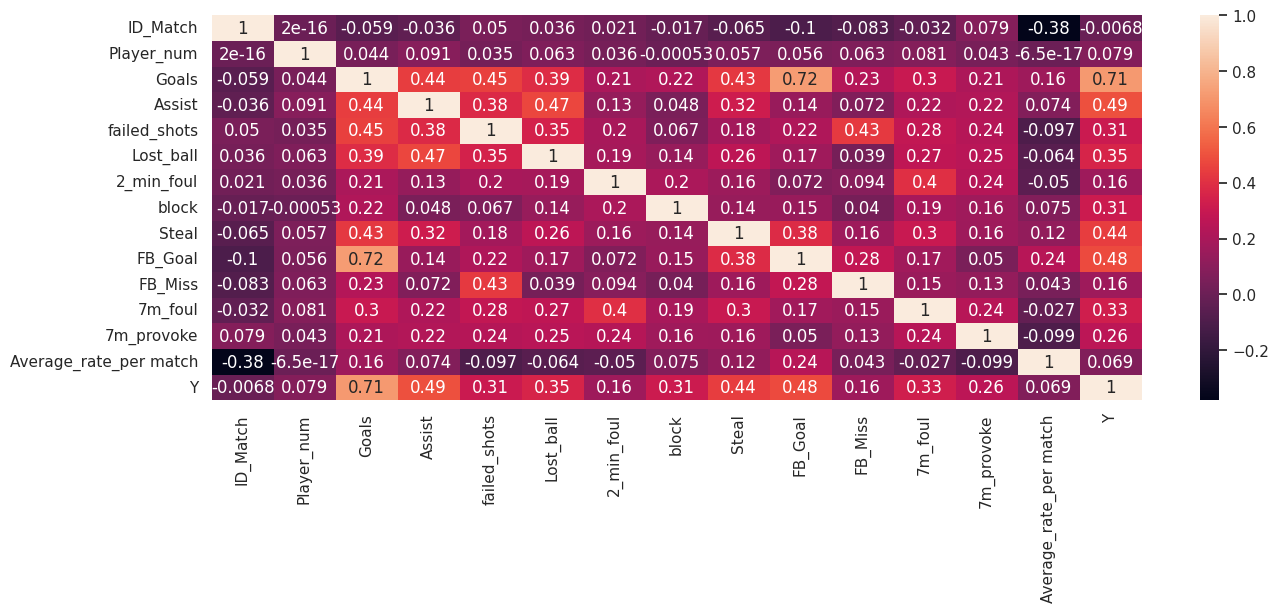

In [ ]:
"""
in this cell we examine multicorrelanity, which is knowing if there is any correlation between all columns except the target.
if we found any, we drop the column with less effect on the data.
"""
corr=df.select_dtypes("number").drop(columns="Rate").corr()
plt.figure(figsize = (15,5))
sns.heatmap(corr,annot=True);

In [ ]:
"""
in this cell we examine cardinality which is knowing if there is a feature that has tremnnous values or very little values. if we found a feature with
high or low cardinality we would drop it
"""
df.nunique()

ID_Match                   41
Player_Name                23
Player_num                 22
opponent_name              17
Date                       41
position                    7
Goals                      12
Assist                      9
failed_shots                9
Lost_ball                   6
2_min_foul                  4
block                       7
Steal                       6
FB_Goal                     9
FB_Miss                     6
7m_foul                     5
7m_provoke                  4
Rate                      232
Average_rate_per match     41
Y                           2
dtype: int64

##The Efficiency of all players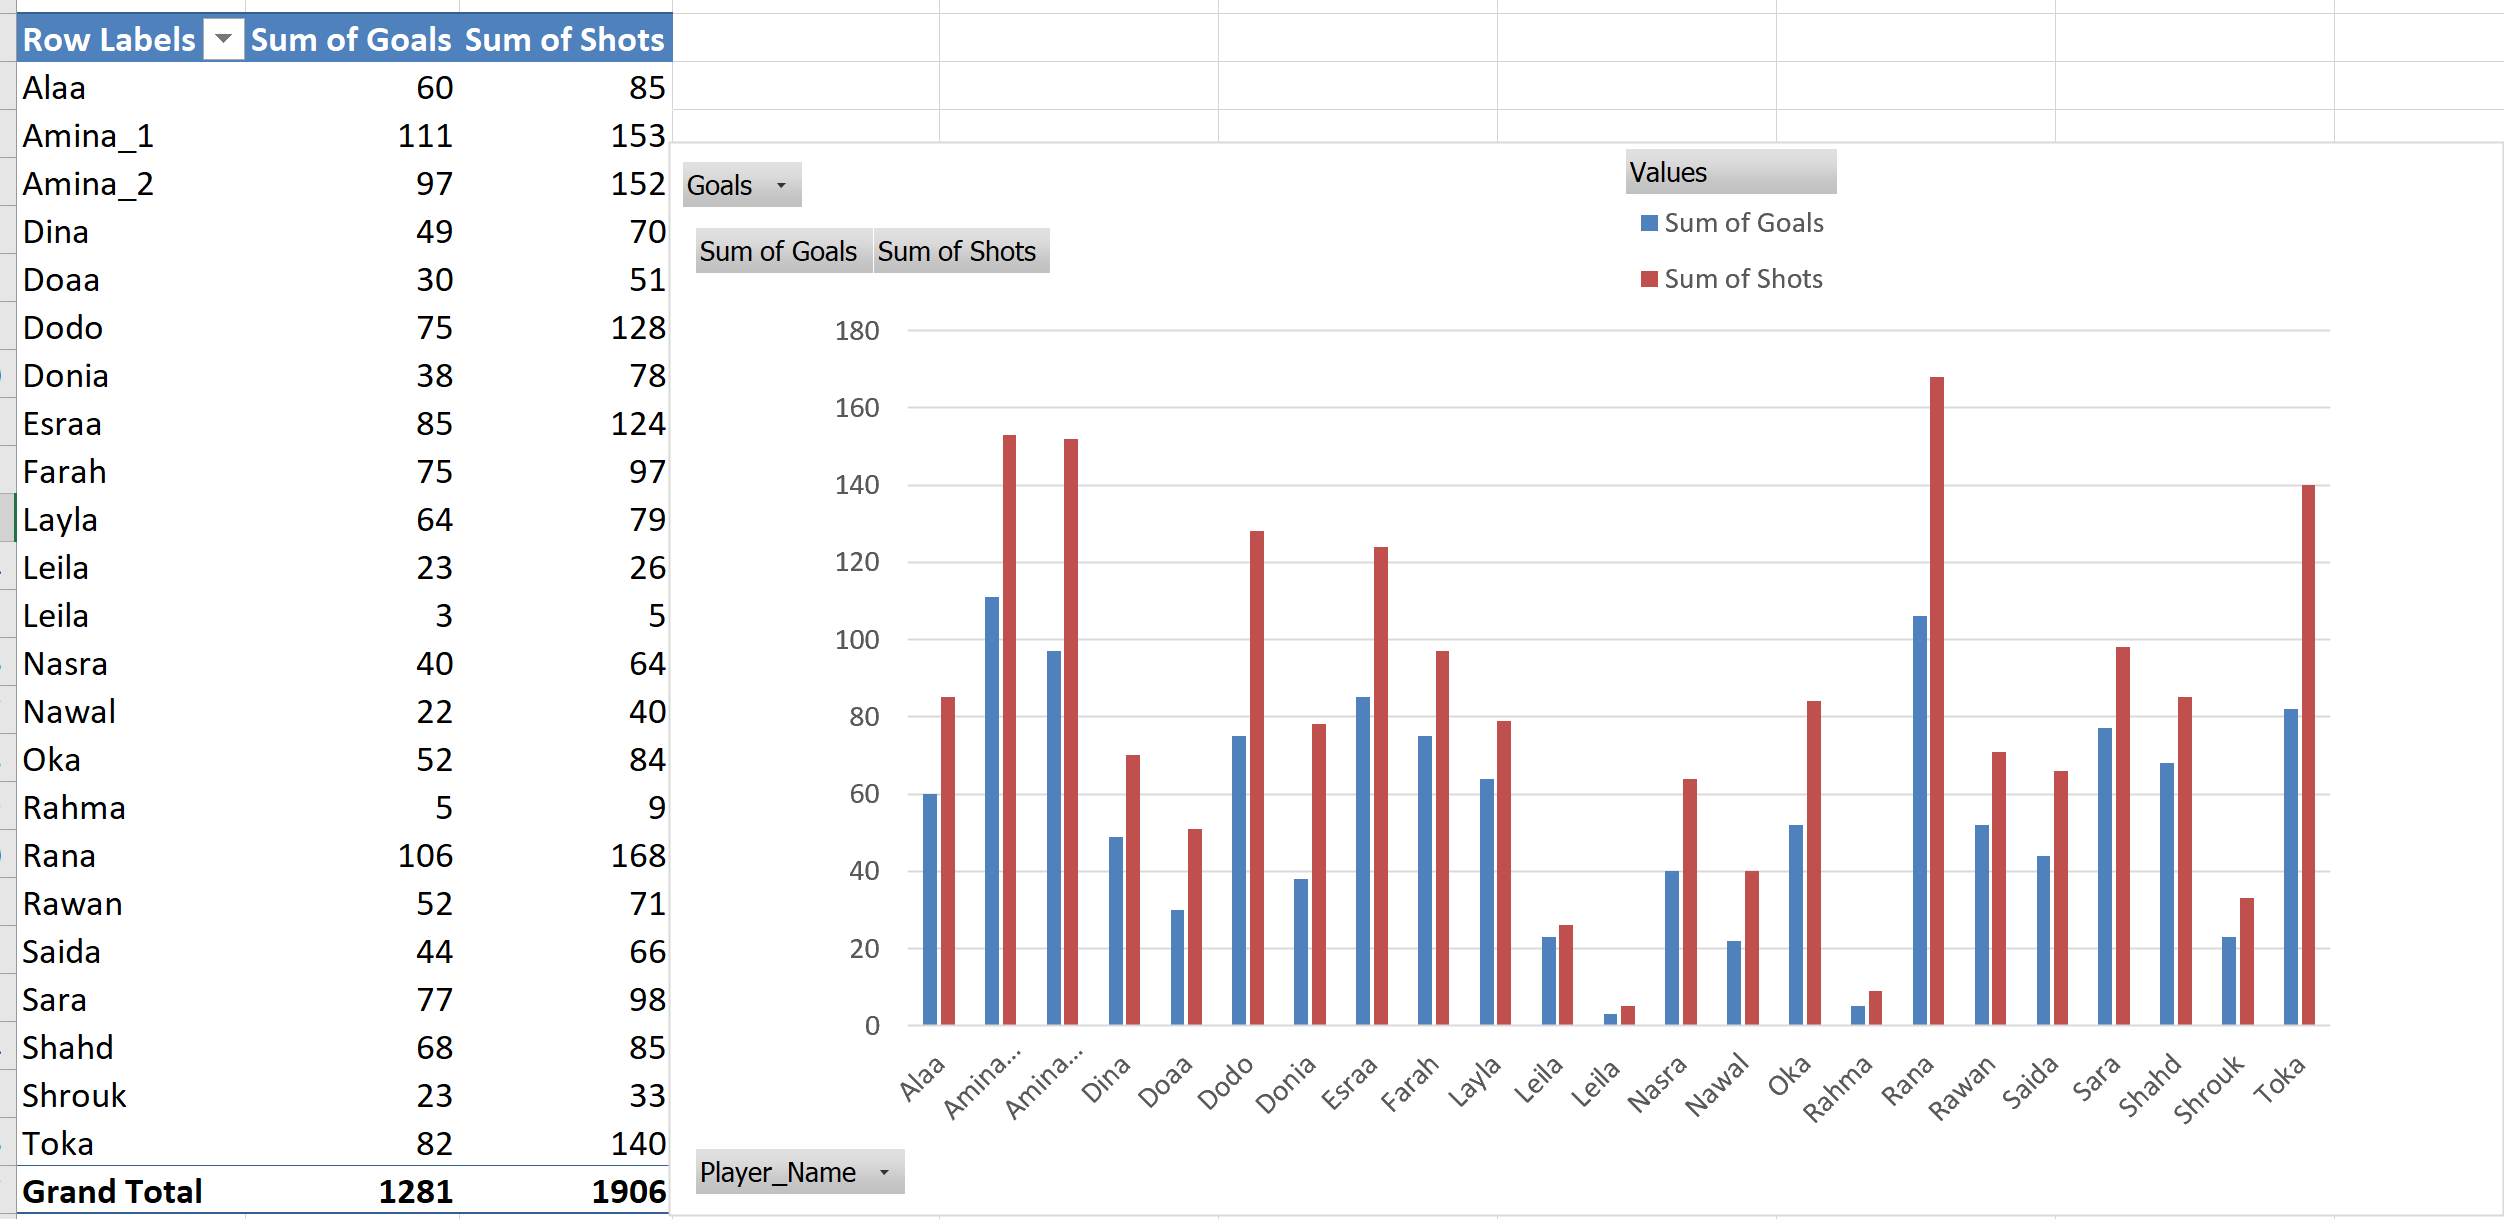





This chart Shows Each Player and her efficiency From Shots and Goals. By this
chart we found that player Amina with number 4 was the highest player in the season by scoring 111 goal from 153 shots. so she is considered the most efficient player  in the team. On the contrary, we will find that Rahama with number 13 had the lowest Shots and Goals because she played about 3 matches in the season.

## The Efficieny of each position
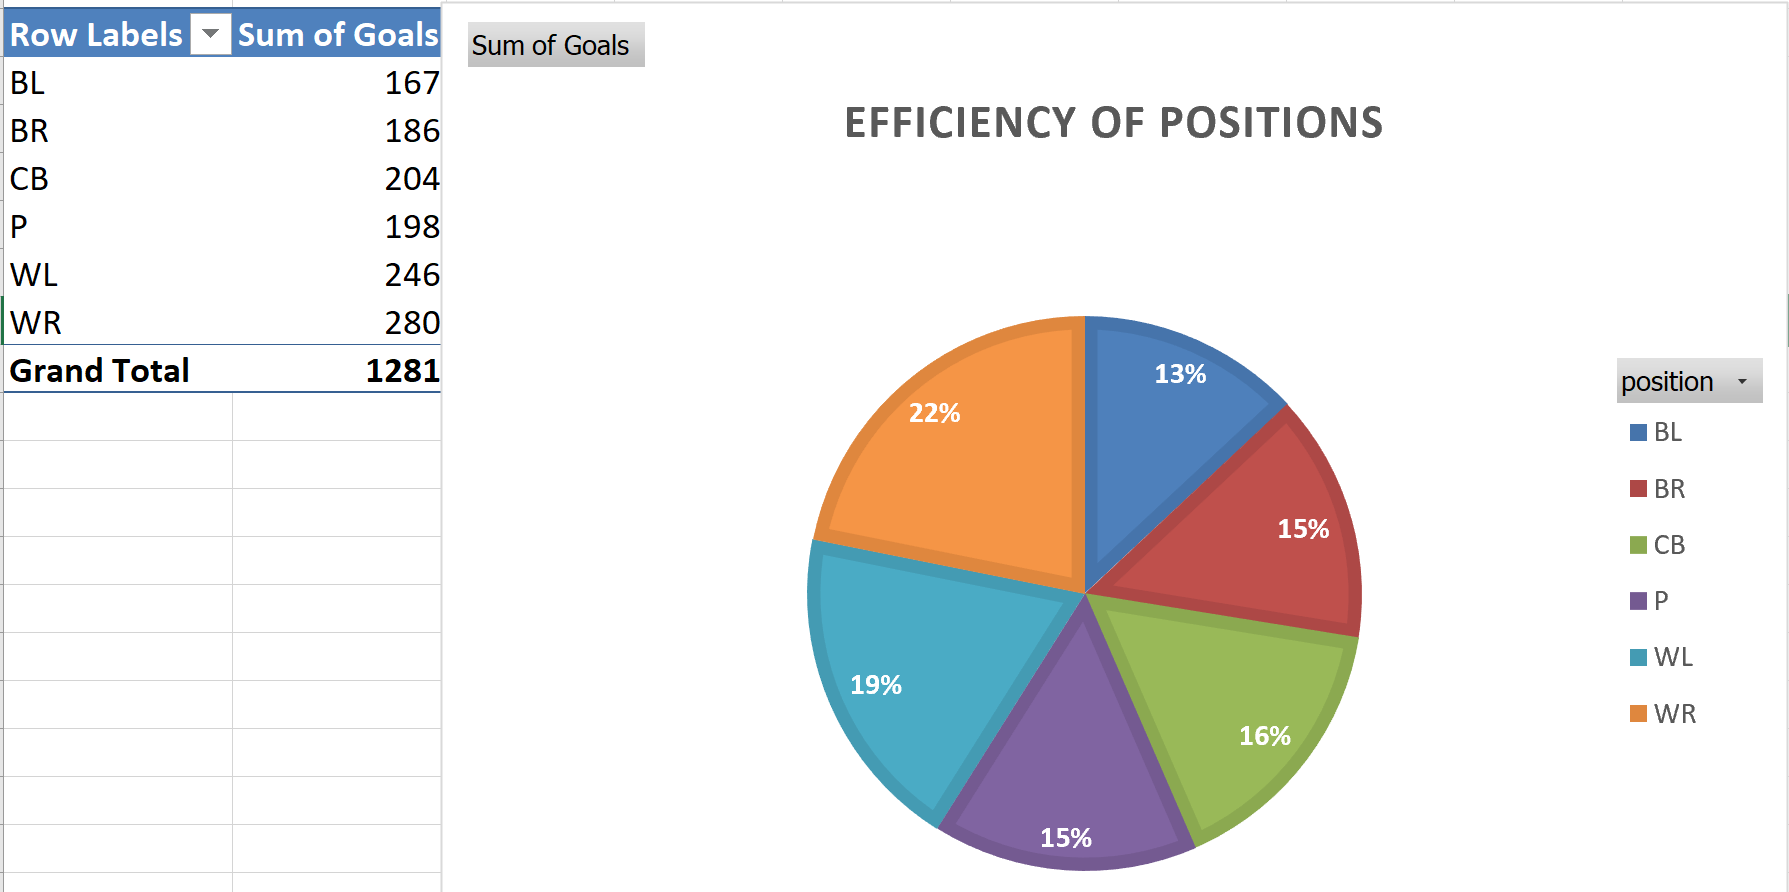

This chart Shows Each Position and Its efficiency From Shots and Goals. so from the chart we found that all positions are very close in it's efficiency there is no high difference between them but the most position scored goals is wing left (WL) with 246 Goal so we considerd this point as very strength point that help team to win On the contrary, we will find that the lowest position scored goals in this season is Back left (BL) with 167 goal so we considerd it as a weakness point should improve it in next season.

## The Efficiency of Center Backs (CB) in defence 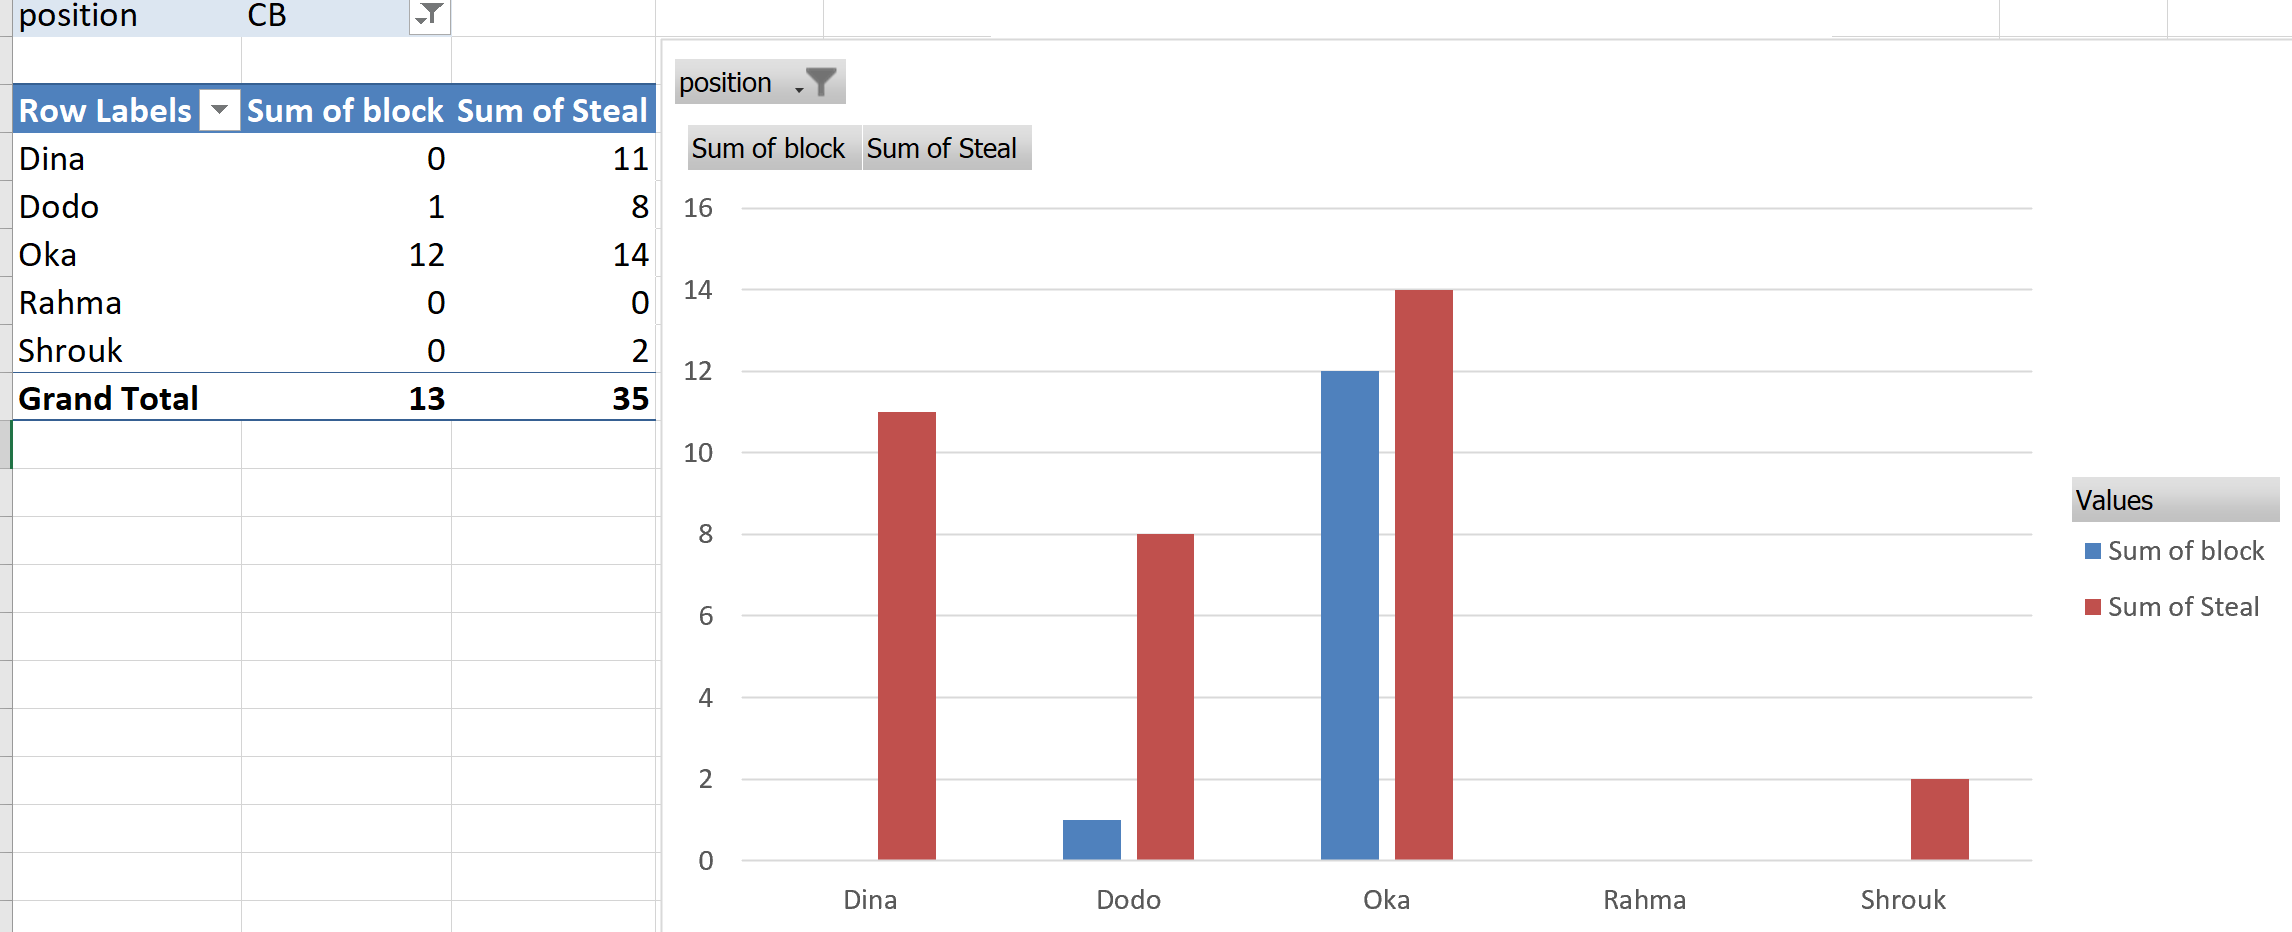

This chart Shows the efficiency of each player of Center Backs in defense  so this chart compare between players depending on Steal and Block because they are most important features in Rating the defense of players so we will find That Oka with number 25 has the highst efficiency in defense with 12 block and 14 steal in a season On the contrary, we will find that Rahama with number 13 had lowest Steal value and Blocks


## Top players Rating in a season
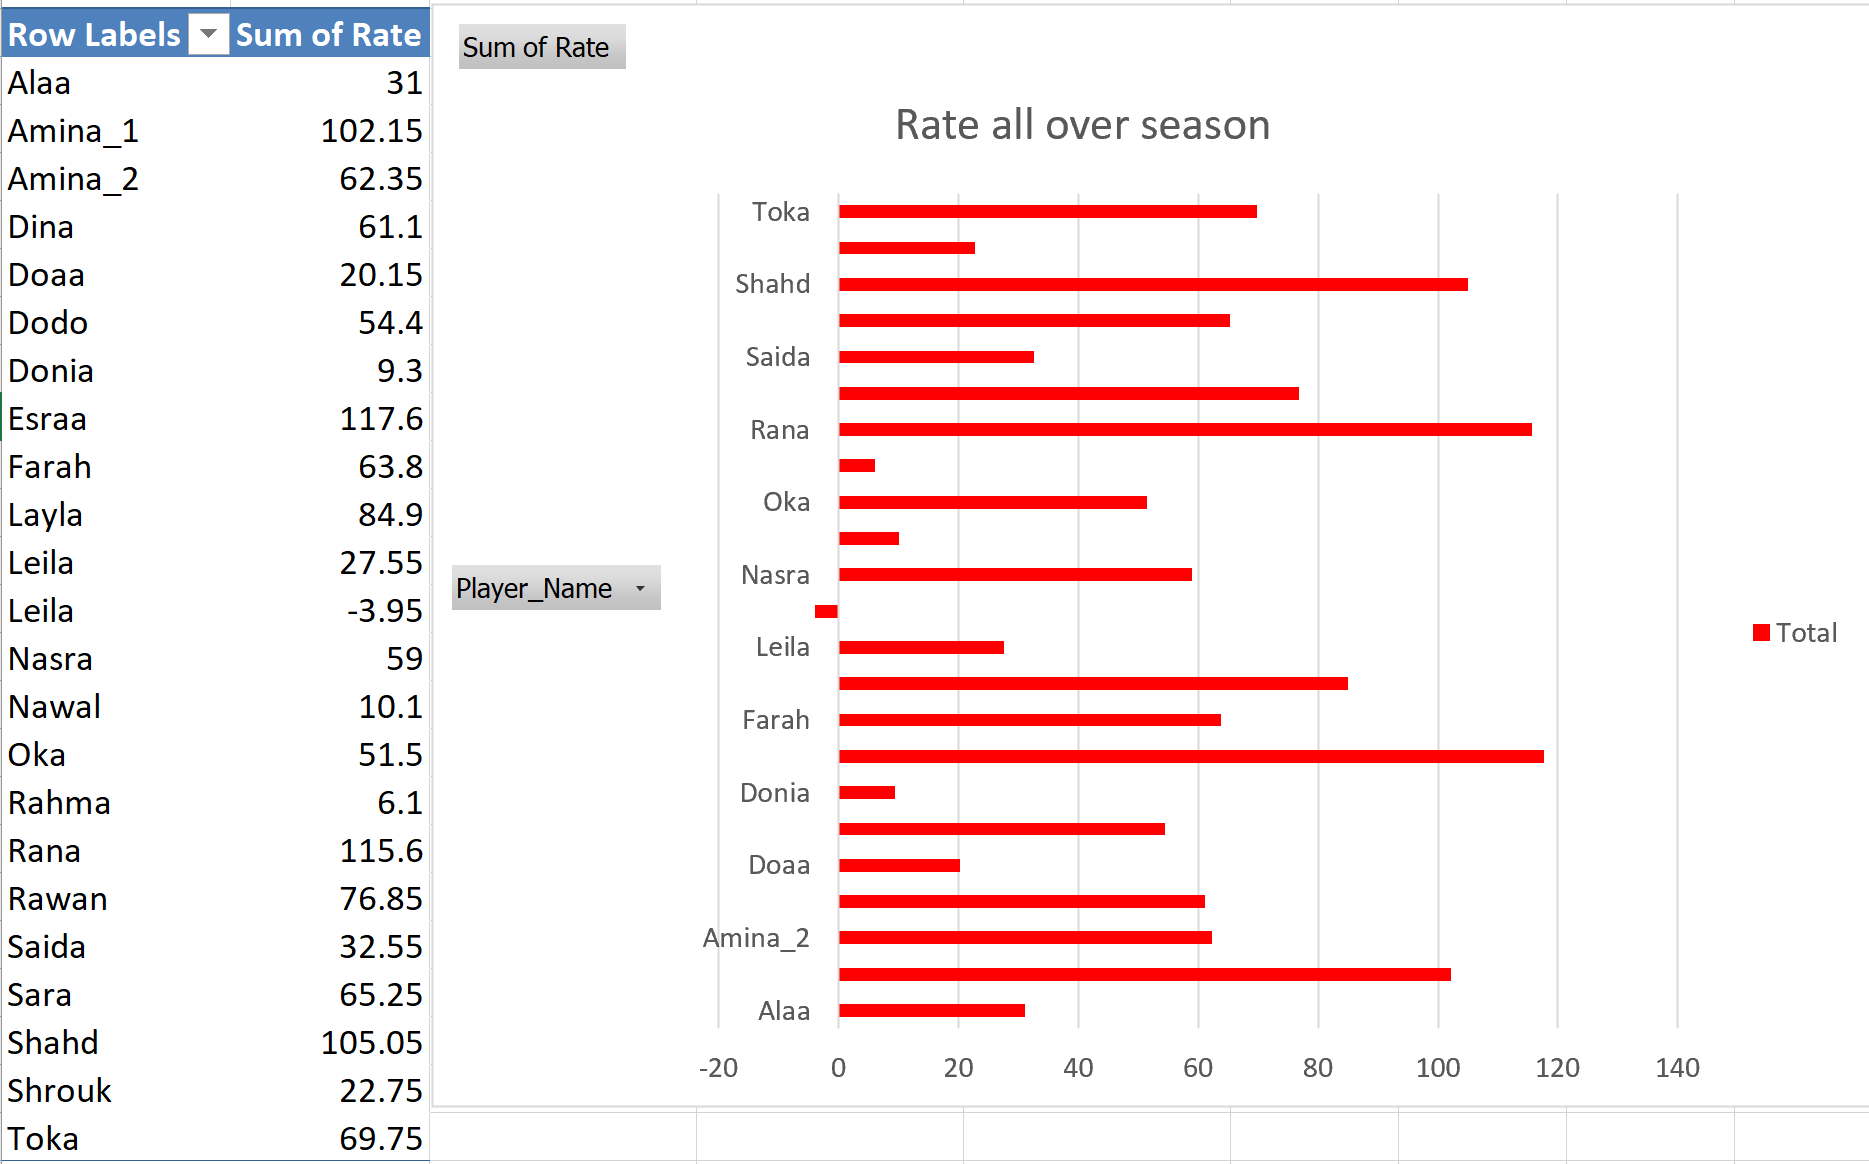

This Stat Shows the sum of rating of each player all over a season this stat will help us to know what are players that they can considerd as the backbone of the team so we got that Essra with number 65 has the highest rating in a season with total rate 117.6 that prove the importance of her in a squad On the contrary, we will find that Rahama with number 13 had the lowest

# Split

In [ ]:
"""
The split phase is where we divide our data into two groups train data and test data. the train data is where the model extract the knowledge it need
to make the predictions, and the split data is where we apply the extracted knowledge to measure the accuaracy of the model.
in this cell we make the first step of the split which is vertical split where we split the target out of the data frame
"""
target = "Y"
X=df.drop(columns=target)
y=df[target]
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (902, 19)
y shape: (902,)


In [ ]:
#using the train_test_split library to split the data horizontly to train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (721, 19)
y_train shape: (721,)
X_test shape: (181, 19)
y_test shape: (181,)


# Building model

in this phase we build all possible model to work on our data to get the best accuracy from them, we use different model algorthim with different codes but first we set our baseline by getting the majority of the data percentage.

###  Baseline

In [ ]:
#getting the majority of the data to set the baseline
acc_baseline = df["Y"].value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.5632


### Build model 1 (logestic regerssion)

In [ ]:
#building the first model with logistic regression algorithm
# Build model
model_LR = make_pipeline(
OneHotEncoder(handle_unknown='ignore'),
LogisticRegression(max_iter=1000))
# Fit model to training data
model_LR.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [ ]:
#in this cell we test the model after extracting the knowledge on the train data and test data to see how our model gonna work
acc_train = accuracy_score(y_train,model_LR.predict(X_train))
acc_test= accuracy_score(y_test,model_LR.predict(X_test))

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.99
Test Accuracy: 0.96


### Communicate result 1 (logestic regerssion)


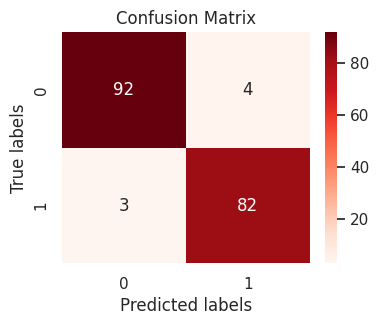

In [ ]:
#seeing the results of the model after predicting X_test to see if it's appropriate
# confusion matrix
cm = confusion_matrix(y_test, model_LR.predict(X_test))
# Create a heatmap using Seaborn
plt.figure(figsize = (4,3));
sns.heatmap(cm, annot=True, cmap='Reds')

# Add labels and title to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
# classification report
print(classification_report(y_test,model_LR.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        96
           1       0.95      0.96      0.96        85

    accuracy                           0.96       181
   macro avg       0.96      0.96      0.96       181
weighted avg       0.96      0.96      0.96       181



### Build model 2 (Desicion Tree)

In [ ]:
#building the second model with decision tree algorithm
# making Decision Tree model
model_DT= make_pipeline(
  OneHotEncoder(handle_unknown='ignore'),
  DecisionTreeClassifier(max_depth=6,random_state=42))

# fitting data
model_DT.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=6, random_state=42))])

In [ ]:
#in this cell we test the model after extracting the knowledge on the train data and test data to see how our model gonna work
DT_score_train= model_DT.score(X_train,y_train)
DT_score_test =model_DT.score(X_test,y_test)
print("Training Accuracy:", round(DT_score_train, 2))
print("test Accuracy:", round(DT_score_test, 2))


Training Accuracy: 0.97
test Accuracy: 0.96


tree depth

In [ ]:
#extracting the best depth of the tree to perform best
tree_depth = model_DT.named_steps["decisiontreeclassifier"].get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 6


In [ ]:
"""
making a for loop to iterate the code on all the possible depths the tree could reach and check the accuracy of each one to determine the best depth
"""
depth_hyperparams=range(1,50,2)

# Create empty lists for training and validation accuracy scores
training_acc = []
test_acc = []

for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    test_model = make_pipeline(OneHotEncoder(handle_unknown='ignore'),DecisionTreeClassifier(max_depth=d,random_state=42))
    # Fit model to training data
    test_model.fit(X_train, y_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(X_train,y_train))
    # Calculate validation accuracy score and append to `training_acc`
    test_acc.append(test_model.score(X_test,y_test))

print("Training Accuracy Scores:", training_acc[:3])
print("test Accuracy Scores:", test_acc[:3])

Training Accuracy Scores: [0.9223300970873787, 0.9431345353675451, 0.9611650485436893]
test Accuracy Scores: [0.9281767955801105, 0.9447513812154696, 0.9558011049723757]


### Communicate results 2 (Decision tree)

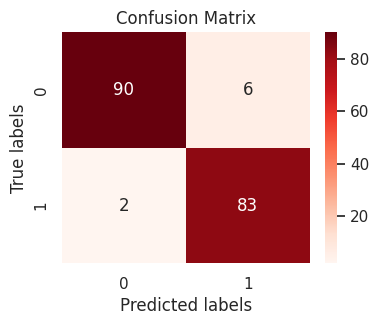

In [ ]:
#seeing the results of the model after predicting X_test to see if it's appropriate
# confusion matrix
cm = confusion_matrix(y_test, model_DT.predict(X_test))
# Create a heatmap using Seaborn
plt.figure(figsize = (4,3));
sns.heatmap(cm, annot=True, cmap='Reds')
# Add labels and title to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
# classification report
print(classification_report(y_test,model_DT.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        96
           1       0.93      0.98      0.95        85

    accuracy                           0.96       181
   macro avg       0.96      0.96      0.96       181
weighted avg       0.96      0.96      0.96       181



In [ ]:
features = X_train.columns
importances = model_DT.named_steps["decisiontreeclassifier"].feature_importances_

print("Features:", features[:21])
print("Importances:", importances[:21])

Features: Index(['ID_Match', 'Player_Name', 'Player_num', 'opponent_name', 'Date',
       'position', 'Goals', 'Assist', 'failed_shots', 'Lost_ball',
       '2_min_foul', 'block', 'Steal', 'FB_Goal', 'FB_Miss', '7m_foul',
       '7m_provoke', 'Rate', 'Average_rate_per match'],
      dtype='object')
Importances: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Build model 3 (Random forest)

In [ ]:
#building the third model with random forest algorithm
clf= make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    RandomForestClassifier(random_state=42)
)
print(clf)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


In [ ]:
#performing cross validation with the classifier
cv_acc_scores = cross_val_score(clf, X_train, y_train, cv=5, n_jobs=-1)
print(cv_acc_scores)

[0.91034483 0.92361111 0.90972222 0.92361111 0.91666667]


In [ ]:
#defining the parameters we will enter in the grid search model
params ={
    "randomforestclassifier__n_estimators": range(25,100,25),
    "randomforestclassifier__max_depth": range(10,50,10)
}
params

{'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [ ]:
#the grid search is a method like the pipeline used with the random forest to help get the results out from it
model_RF = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model_RF

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('onehotencoder',
                                        OneHotEncoder(handle_unknown='ignore')),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25)},
             verbose=1)

In [ ]:
#fitting the train data to the model to extract the knowledge out of it
model_RF.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('onehotencoder',
                                        OneHotEncoder(handle_unknown='ignore')),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25)},
             verbose=1)

## Communicate results 2 (Random forset)



In [ ]:
#extracting the results in a dataframe to compare between all possible alternatives
cv_results = pd.DataFrame(model_RF.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.098108,0.002661,0.015684,0.000971,10,25,"{'randomforestclassifier__max_depth': 10, 'ran...",0.917241,0.923611,0.923611,0.916667,0.916667,0.919559,0.003315,6
1,0.181900,0.010640,0.023342,0.006584,10,50,"{'randomforestclassifier__max_depth': 10, 'ran...",0.910345,0.916667,0.916667,0.937500,0.916667,0.919569,0.009294,3
2,0.257839,0.012527,0.029710,0.008305,10,75,"{'randomforestclassifier__max_depth': 10, 'ran...",0.910345,0.923611,0.923611,0.923611,0.916667,0.919569,0.005339,3
3,0.107561,0.005533,0.016412,0.003059,20,25,"{'randomforestclassifier__max_depth': 20, 'ran...",0.917241,0.916667,0.909722,0.944444,0.916667,0.920948,0.012071,1
4,0.190813,0.008131,0.020762,0.001135,20,50,"{'randomforestclassifier__max_depth': 20, 'ran...",0.910345,0.923611,0.909722,0.930556,0.916667,0.918180,0.007973,7
5,0.272052,0.010658,0.024604,0.001086,20,75,"{'randomforestclassifier__max_depth': 20, 'ran...",0.910345,0.923611,0.916667,0.923611,0.916667,0.918180,0.004999,9
6,0.103266,0.004626,0.014384,0.000415,30,25,"{'randomforestclassifier__max_depth': 30, 'ran...",0.924138,0.916667,0.909722,0.930556,0.923611,0.920939,0.007126,2
7,0.183546,0.006282,0.019689,0.000771,30,50,"{'randomforestclassifier__max_depth': 30, 'ran...",0.910345,0.916667,0.909722,0.930556,0.916667,0.916791,0.007497,12
8,0.272023,0.008761,0.026251,0.002290,30,75,"{'randomforestclassifier__max_depth': 30, 'ran...",0.910345,0.923611,0.916667,0.923611,0.916667,0.918180,0.004999,9
9,0.100966,0.001960,0.015127,0.000910,40,25,"{'randomforestclassifier__max_depth': 40, 'ran...",0.917241,0.916667,0.909722,0.930556,0.923611,0.919559,0.007040,5


In [ ]:
#extracting the parameteres relklated to best results
model_RF.best_params_

{'randomforestclassifier__max_depth': 20,
 'randomforestclassifier__n_estimators': 25}

In [ ]:
#extracting the best classifier to use in the grid search
model_RF.best_estimator_

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=20, n_estimators=25,
                                        random_state=42))])

In [ ]:
#extracting the highest score from the random forest
model_RF.best_score_

0.920948275862069

In [ ]:
#in this cell we test the model after extracting the knowledge on the train data and test data to see how our model gonna work
acc_train = model_RF.score(X_train,y_train)
acc_test_RF = model_RF.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test_RF, 4))

Training Accuracy: 0.9986
Test Accuracy: 0.9448


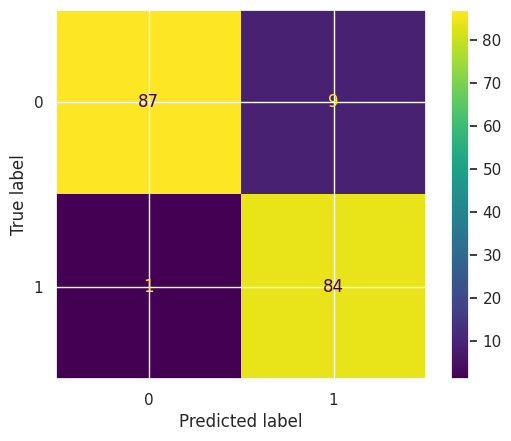

In [ ]:
#seeing the results of the model after predicting X_test to see if it's appropriate
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_RF,X_test,y_test);


In [ ]:
# classification report
print(classification_report(y_test,model_RF.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95        96
           1       0.90      0.99      0.94        85

    accuracy                           0.94       181
   macro avg       0.95      0.95      0.94       181
weighted avg       0.95      0.94      0.94       181



## Build model 4 (Support Vector Machines)

In [ ]:
#building the forth model with Support Vector Machines algorithm
SVC_clf = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    SVC()
)

# fit
SVC_clf.fit(X_train,y_train)

# predict
SVC_pred = SVC_clf.predict(X_train)

In [ ]:
#in this cell we test the model after extracting the knowledge on the train data and test data to see how our model gonna work
acc_train = accuracy_score(y_train,SVC_pred)
acc_test_SVC = accuracy_score(y_test,SVC_clf.predict(X_test))

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test_SVC, 2))

Training Accuracy: 0.97
Test Accuracy: 0.94


## Communicate results 4 ( SVC )

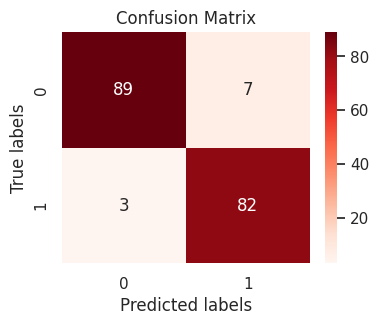

In [ ]:
#seeing the results of the model after predicting X_test to see if it's appropriate
# confusion matrix
cm = confusion_matrix(y_test, SVC_clf.predict(X_test))
# Create a heatmap using Seaborn
plt.figure(figsize = (4,3));
sns.heatmap(cm, annot=True, cmap='Reds')
# Add labels and title to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
# classification report
print(classification_report(y_test,SVC_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        96
           1       0.92      0.96      0.94        85

    accuracy                           0.94       181
   macro avg       0.94      0.95      0.94       181
weighted avg       0.95      0.94      0.94       181



## Build model 5 ( Linear SVC)

In [ ]:
# building the fifth model with linear SVC algorithm
Linear_SVC = make_pipeline(
     OneHotEncoder(handle_unknown='ignore'),
     LinearSVC()
)
# fit
Linear_SVC.fit(X_train,y_train)
# predict
Linear_SVC_pred = Linear_SVC.predict(X_train)

In [ ]:
#in this cell we test the model after extracting the knowledge on the train data and test data to see how our model gonna work
acc_train = accuracy_score(y_train,Linear_SVC_pred)
acc_test_Linear_SVC = accuracy_score(y_test,Linear_SVC.predict(X_test))

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test_Linear_SVC, 2))

Training Accuracy: 1.0
Test Accuracy: 0.97


## Communicate result 5 (Linear SVC)

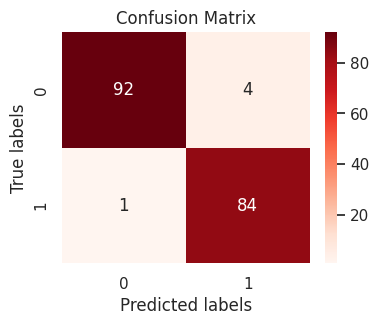

In [ ]:
#seeing the results of the model after predicting X_test to see if it's appropriate
# confusion matrix
cm = confusion_matrix(y_test, Linear_SVC.predict(X_test))
# Create a heatmap using Seaborn
plt.figure(figsize = (4,3));
sns.heatmap(cm, annot=True, cmap='Reds')
# Add labels and title to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
# classification report
print(classification_report(y_test,Linear_SVC.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        96
           1       0.95      0.99      0.97        85

    accuracy                           0.97       181
   macro avg       0.97      0.97      0.97       181
weighted avg       0.97      0.97      0.97       181



## Build model 6 ( K-Nearest Neighbors (KNN))

In [ ]:
# building the sixth model with K-Nearest Neighbors algorithm
KNN_clf = make_pipeline(
     OneHotEncoder(handle_unknown='ignore'),
    KNeighborsClassifier(n_neighbors=3))

# fit
KNN_clf.fit(X_train,y_train)

# predict
KNN_pred = KNN_clf.predict(X_train)


In [ ]:
#in this cell we test the model after extracting the knowledge on the train data and test data to see how our model gonna work
acc_train = accuracy_score(y_train,KNN_pred)
acc_test_KNN = accuracy_score(y_test,KNN_clf.predict(X_test))

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test_KNN, 2))

Training Accuracy: 0.86
Test Accuracy: 0.72


## Communicate results ( ( K-Nearest Neighbors (KNN)))

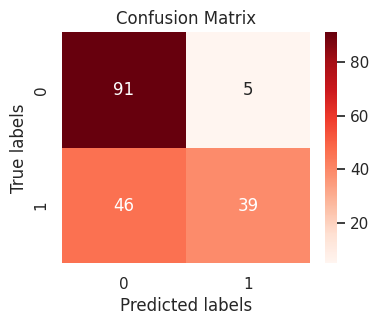

In [ ]:
#seeing the results of the model after predicting X_test to see if it's appropriate
# confusion matrix
cm = confusion_matrix(y_test, KNN_clf.predict(X_test))
# Create a heatmap using Seaborn
plt.figure(figsize = (4,3));
sns.heatmap(cm, annot=True, cmap='Reds')

# Add labels and title to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
# classification report
print(classification_report(y_test,KNN_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.66      0.95      0.78        96
           1       0.89      0.46      0.60        85

    accuracy                           0.72       181
   macro avg       0.78      0.70      0.69       181
weighted avg       0.77      0.72      0.70       181



## Build model 7 Stochastic Gradient Descent (SGD)

In [ ]:
#building the seventh model with Stochastic Gradient Descent algorithm
SGD_clf = make_pipeline(
     OneHotEncoder(handle_unknown='ignore'),
    SGDClassifier(max_iter=5, tol=None))

# fit
SGD_clf.fit(X_train,y_train)

# predict
SGD_pred = SGD_clf.predict(X_train)


In [ ]:
#in this cell we test the model after extracting the knowledge on the train data and test data to see how our model gonna work
acc_train = accuracy_score(y_train,SGD_pred)
acc_test_SGD = accuracy_score(y_test,SGD_clf.predict(X_test))

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test_SGD, 2))

Training Accuracy: 0.98
Test Accuracy: 0.96


## Communaction results 7 (Stochastic Gradient Descent (SGD))

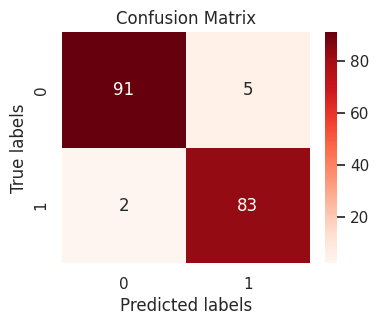

In [ ]:
#seeing the results of the model after predicting X_test to see if it's appropriate
# confusion matrix
cm = confusion_matrix(y_test, SGD_clf.predict(X_test))
# Create a heatmap using Seaborn
plt.figure(figsize = (4,3));
sns.heatmap(cm, annot=True, cmap='Reds')
# Add labels and title to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
# classification report
print(classification_report(y_test,SGD_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        96
           1       0.94      0.98      0.96        85

    accuracy                           0.96       181
   macro avg       0.96      0.96      0.96       181
weighted avg       0.96      0.96      0.96       181



# What is the Best algorithm ?

## Models Accuracy

In [ ]:
"""
in this step we evaluate all the models by the accuracy score of each one, we put all the models and thier accuracy score in a
data frame and sort them descending to see the highest
"""
models = pd.DataFrame({ 'Model': ['LR', 'KNN', 'SVC','Linear SVC', 'DT', 'RF', 'SGD'],
                       'Score': [acc_test ,acc_test_KNN, acc_test_SVC, acc_test_SVC, DT_score_test, acc_test_RF, acc_test_SGD]
                     })
models.sort_values(by='Score', ascending=False)

,Model,Score
0,LR,0.961326
6,SGD,0.961326
4,DT,0.955801
2,SVC,0.944751
3,Linear SVC,0.944751
5,RF,0.944751
1,KNN,0.718232


## Classification reports

In [ ]:
"""
after we evaluate the models due to thier accuracy score we found that they are very close to each other so we compare between them using the
classification report to see the recall and precision percentage to determine the best model
"""
print('--'*30)
print('LR classification Report:')
print('--'*30)
print(classification_report(y_test,model_LR.predict(X_test)))
print('--'*30)

print('SVC classification Report:')
print('--'*30)
print(classification_report(y_test,SVC_clf.predict(X_test)))
print('--'*30)

print('Linear-SVC classification Report:')
print('--'*30)
print(classification_report(y_test,Linear_SVC.predict(X_test)))
print('--'*30)

print('KNN classification Report:')
print('--'*30)
print(classification_report(y_test,KNN_clf.predict(X_test)))
print('--'*30)

print('DT classification Report:')
print('--'*30)
print(classification_report(y_test,model_DT.predict(X_test)))
print('--'*30)

print('RF classification Report:')
print('--'*30)
print(classification_report(y_test,model_RF.predict(X_test)))
print('--'*30)

print('SGD classification Report:')
print('--'*30)
print(classification_report(y_test,SGD_clf.predict(X_test)))
print('--'*30)

------------------------------------------------------------
LR classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        96
           1       0.95      0.96      0.96        85

    accuracy                           0.96       181
   macro avg       0.96      0.96      0.96       181
weighted avg       0.96      0.96      0.96       181

------------------------------------------------------------
SVC classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        96
           1       0.92      0.96      0.94        85

    accuracy                           0.94       181
   macro avg       0.94      0.95      0.94       181
weighted avg       0.95      0.94      0.94       181

-------------------------------------------------

# Communicate Results

## Save Module as Pickle

In [ ]:
#putting the model in a function to perform the predections on any desired data
# create function to take test data and predict best players
y_pred1 = model_LR.predict(X_test)
df2= pd.DataFrame({"players":X_test.Player_Name,"Position":X_test.position,"Player_num":X_test.Player_num,"Points":y_pred1,"Goals":X_test.Goals,"Assist":X_test.Assist}).reset_index(drop=True)
sum_points = df2.groupby(['players', 'Position', 'Player_num'])['Points'].sum()
 # Convert Series to DataFrame
sum_points_df = pd.DataFrame(sum_points).reset_index().sort_values('Points',ascending=False).head(6)


In [ ]:
"""
after choosing the logistic regression model we will upload it on a pickle which is a library used to save our model information for
future use and to put it other softwares, so it will help us put it on the website
"""
import pickle
# Save your model as "model-1.pkl"
with open ("model-1.pkl","wb") as f:
    pickle.dump(model_LR,f)

In [ ]:
#check if the model were uploaded correctly
with open ("model-1.pkl","rb") as f :
    loaded_model = pickle.load(f)
print(loaded_model)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('logisticregression', LogisticRegression(max_iter=1000))])


In [ ]:
%%bash
cat module.py

cat: module.py: No such file or directory


CalledProcessError: ignored

## Test module

In [ ]:
# Import your module
from module import make_predictions,make_plot_1

# Generate predictions
y_pred1= make_predictions(
    data_filepath="/content/drive/MyDrive/Graduation project/Test data.xlsx",
    model_filepath="/content/model-1.pkl",
)

plot = make_plot_1("/content/drive/MyDrive/Graduation project/Test data.xlsx")
y_pred1

In [ ]:
# Import your module
from module import make_plot_2

# Generate Plot
plot = make_plot_2(
    data_filepath = "/content/drive/MyDrive/Graduation project/Test data.xlsx"
)


In [ ]:
type(y_pred1)

In [ ]:
pip install fpdf

## Create PDF

In [ ]:

from fpdf import FPDF
import matplotlib.pyplot as plt
import numpy as np
from module import make_predictions,make_plot_1,make_plot_2

class PDF(FPDF):
    def __init__(self):
        super().__init__()
    def header(self):
        # Set up logo image
        self.image('/content/drive/MyDrive/Graduation project/DATA/Photos/new 25.png', 10, 8, 33)
        # Set up header text
        self.set_font('Arial', 'B', 15)
        self.cell(80)
        self.ln(20)
    def content(self):
        # Generate data
        y_pred1= make_predictions(
                  data_filepath="/content/drive/MyDrive/Graduation project/Test data.xlsx",
                  model_filepath="/content/model-1.pkl")
        # Set up table
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Predicted Squad', 1, 1, 'C')
        self.set_font('Arial', 'B', 10)
        col_width = self.w / 4.44
        row_height = self.font_size * 1.5
        for col in y_pred1.columns:
            self.cell(col_width, row_height, str(col), border=1)
        self.ln()
        for row in y_pred1.values:
            for value in row:
                self.cell(col_width, row_height, str(value), border=1)
            self.ln()

        # Set plots images
        plot_1 = make_plot_1("/content/drive/MyDrive/Graduation project/Test data.xlsx")
        plot_2 = make_plot_2("/content/drive/MyDrive/Graduation project/Test data.xlsx")
        # Add some space after the data frame
        self.ln(10)

        # Add a title
        self.set_font('Arial', 'B', 16)
        self.cell(0, 10, 'Title', 0, 1)

        # Add the first image with header
        self.set_font('Arial', 'B', 12)
        self.image(plot_1, y=100, w=180, h=90)

        # Add some space between the images
        self.ln(20)

        # Add the second image with header
        self.set_font('Arial', 'B', 12)
        self.image(plot_2 , y=190, w=180, h=100)

# Create PDF object and add content
pdf = PDF()
pdf.add_page()
pdf.header()
pdf.content()


# Save PDF
pdf.output('example.pdf', 'F')

In [ ]:
"""
In this step we start analyzing the data, we can do the analysis with statistics or charts and graphs or both, this provides us with valuable information
about the data, these information we can take into consideration while building the model, in this cell we make a chart that shows us the most valuable
player in the team during the season
"""
# Group the DataFrame by player name and sum the goals
sum_goals = df.groupby('Player_Name')[['Goals', 'Assist']].sum().reset_index()
# Group each category
players= sum_goals['Player_Name']
goals = sum_goals["Goals"]
assists = sum_goals['Assist']
# Generate the bar chart
fig, ax = plt.subplots(figsize=(22, 10))  # Set the figure size
ax.bar(players, goals, label='Goals')
ax.bar(players, assists, label='Assists', color='red')
ax.set_xlabel('Player Name')
ax.set_ylabel('Goals/Assists')
ax.set_title('Goals and Assists by Player')
ax.legend()
# Add annotations for each bar
for i, (b, s) in enumerate(zip(goals, assists)):
    ax.annotate(f"Block: {b}", xy=(i, b), ha='center', va='top')
    ax.annotate(f"Steal: {s}", xy=(i, s), ha='center', va='top')
x= plt.show()

x